In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04c68ed96adcc36701de649af633f563


In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-35.06593941769316 -65.25909130860506
87.46690609409623 76.73992516009957
1.819133729050833 179.41683853206257
34.64277298048549 2.7540033248029374
37.08872728570928 -146.4391586253827
-14.735638478460018 109.74698823692017
-18.813763826382853 66.51844321405375
-71.54663447809415 79.30792279121306
6.677701699914778 -41.70102436876974
73.55832744198335 -103.2990749733745
73.95825016694158 -24.454076207522064
23.36913839090417 -76.48744388184409
-69.58800356658999 -90.5460009942768
-36.06049171766861 -149.70938559816966
45.59676846317305 -86.84256922716138
-21.011614559139133 -43.23036200450602
-89.24119103216742 -27.439650662244816
-48.31662034681842 121.93462463835112
73.19515230072105 -77.98376318379022
-78.26260595167925 -166.48613109336148
-26.769361598185903 -17.02076312173355
-42.1620583719548 103.65177347641759
-82.9261681604617 152.13462847133326
-19.12625619291198 -75.26704243250947
1.4763105138631971 146.3215707311386
83.55131870463325 63.128506573400614
-20.632858390892693 15

-78.07169432990958 -171.10420205163078
-76.97780962718406 -114.28886363743209
-19.87808004573307 165.00366880970176
-29.672713820868417 -160.71634528271343
28.74460642264394 80.05401608863633
79.58583058415135 45.39037468869168
25.903712850689985 -159.7797968934778
-82.41025130168038 34.48136949083977
-81.31327327811505 -153.21563763858472
-57.924473088345394 -10.111151803355654
75.24011060552817 -91.48944411991924
-68.1317854046335 47.24252466375387
1.818243410095036 175.31086861493333
64.65481471752997 17.65161396586413
71.41747056248576 12.650474036740235
-54.587832249246375 -128.12484475840034
-67.1762277768103 70.73084813949168
-24.351891242954707 -51.58630147013159
-37.552496694387685 57.89244389898934
-41.76186469175834 -47.5367283094607
-45.6005414358557 40.43126379097464
-54.41251766116746 25.32922321187516
-83.06452400297735 147.18173749361875
6.6958094320125525 -122.4323497593086
78.45012968781995 -145.62841826160758
-6.992184810058745 44.707974290471384
70.8110847939461 121

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mercedes
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | rungata
City not found. Skipping...
Processing Record 4 of Set 1 | aflu
City not found. Skipping...
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | bambanglipuro
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | carutapera
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | clarence town
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | escanaba
Processing Record 16 of Set 1 | tocantins
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 

Processing Record 38 of Set 4 | malko tarnovo
Processing Record 39 of Set 4 | coquimbo
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | emba
Processing Record 42 of Set 4 | hualmay
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | frederico westphalen
Processing Record 45 of Set 4 | puri
Processing Record 46 of Set 4 | dakar
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | san policarpo
Processing Record 50 of Set 4 | chicama
Processing Record 1 of Set 5 | dwarka
Processing Record 2 of Set 5 | zhigansk
Processing Record 3 of Set 5 | victoria
Processing Record 4 of Set 5 | mackay
Processing Record 5 of Set 5 | nema
Processing Record 6 of Set 5 | port hawkesbury
Processing Record 7 of Set 5 | ancud
Processing Record 8 of Set 5 | san cristobal
Processing Record 9 of Set 5 | ketchikan
Processing Record 10 of Set 5 | plettenberg bay
Processi

Processing Record 27 of Set 8 | warqla
City not found. Skipping...
Processing Record 28 of Set 8 | umm lajj
Processing Record 29 of Set 8 | grand gaube
Processing Record 30 of Set 8 | avera
Processing Record 31 of Set 8 | raudeberg
Processing Record 32 of Set 8 | belgaum
Processing Record 33 of Set 8 | semporna
Processing Record 34 of Set 8 | dongsheng
Processing Record 35 of Set 8 | guerrero negro
Processing Record 36 of Set 8 | eyrarbakki
Processing Record 37 of Set 8 | severo-kurilsk
Processing Record 38 of Set 8 | safaqis
City not found. Skipping...
Processing Record 39 of Set 8 | obzor
Processing Record 40 of Set 8 | jawhar
Processing Record 41 of Set 8 | ewo
Processing Record 42 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 43 of Set 8 | arman
Processing Record 44 of Set 8 | atambua
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | abingdon
Processing Record 47 of Set 8 | masallatah
Processing Record 48 of Set 8 | tagbac
Processing Recor

Processing Record 15 of Set 12 | manono
Processing Record 16 of Set 12 | marsh harbour
Processing Record 17 of Set 12 | deer lake
Processing Record 18 of Set 12 | imbituba
Processing Record 19 of Set 12 | lovozero
Processing Record 20 of Set 12 | deputatskiy
Processing Record 21 of Set 12 | bonavista
Processing Record 22 of Set 12 | colares
Processing Record 23 of Set 12 | lavrentiya
Processing Record 24 of Set 12 | ust-omchug
Processing Record 25 of Set 12 | middelburg
Processing Record 26 of Set 12 | buala
Processing Record 27 of Set 12 | ho chi minh city
Processing Record 28 of Set 12 | yarada
Processing Record 29 of Set 12 | catalao
Processing Record 30 of Set 12 | genc
Processing Record 31 of Set 12 | ituni
City not found. Skipping...
Processing Record 32 of Set 12 | san antonio
Processing Record 33 of Set 12 | podporozhye
Processing Record 34 of Set 12 | esso
Processing Record 35 of Set 12 | haines junction
Processing Record 36 of Set 12 | tezu
Processing Record 37 of Set 12 | ke

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mercedes,-34.6515,-59.4307,36.79,59,36,5.06,AR,2022-07-19 05:26:43
1,Dikson,73.5069,80.5464,45.86,78,60,15.97,RU,2022-07-19 05:26:43
2,Kahului,20.8947,-156.4700,78.82,65,40,23.02,US,2022-07-19 05:23:02
3,Bambanglipuro,-7.9500,110.2833,83.59,69,19,12.64,ID,2022-07-19 05:24:07
4,Busselton,-33.6500,115.3333,61.00,63,0,7.63,AU,2022-07-19 05:26:43
5,Carutapera,-1.1950,-46.0200,74.05,94,50,5.39,BR,2022-07-19 05:22:46
6,Yellowknife,62.4560,-114.3525,66.72,68,75,5.75,CA,2022-07-19 05:26:44
7,Clarence Town,-32.5833,151.7833,55.31,94,100,3.42,AU,2022-07-19 05:26:44
8,Punta Arenas,-53.1500,-70.9167,41.11,70,40,27.63,CL,2022-07-19 05:24:10
9,Mataura,-46.1927,168.8643,45.48,90,100,4.25,NZ,2022-07-19 05:26:44


In [11]:
# Rearrange the columns
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mercedes,AR,2022-07-19 05:26:43,-34.6515,-59.4307,36.79,59,36,5.06
1,Dikson,RU,2022-07-19 05:26:43,73.5069,80.5464,45.86,78,60,15.97
2,Kahului,US,2022-07-19 05:23:02,20.8947,-156.4700,78.82,65,40,23.02
3,Bambanglipuro,ID,2022-07-19 05:24:07,-7.9500,110.2833,83.59,69,19,12.64
4,Busselton,AU,2022-07-19 05:26:43,-33.6500,115.3333,61.00,63,0,7.63
...,...,...,...,...,...,...,...,...,...
555,Ornskoldsvik,SE,2022-07-19 05:41:07,63.2909,18.7153,56.35,71,37,16.11
556,Gravdal,NO,2022-07-19 05:41:07,68.1214,13.5031,53.49,94,75,5.75
557,Ivaipora,BR,2022-07-19 05:41:08,-24.2478,-51.6847,58.96,97,17,5.50
558,Rocha,UY,2022-07-19 05:36:53,-34.4833,-54.3333,41.40,92,57,1.88


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

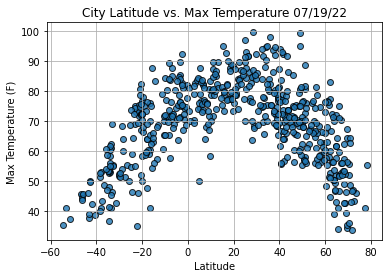

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

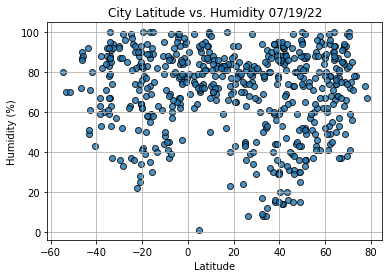

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

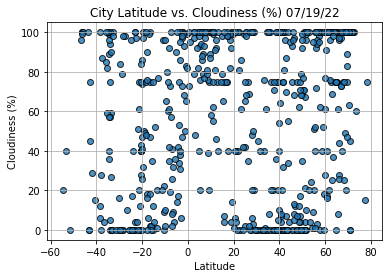

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

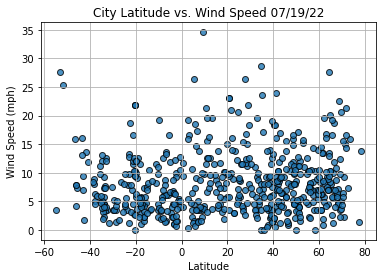

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

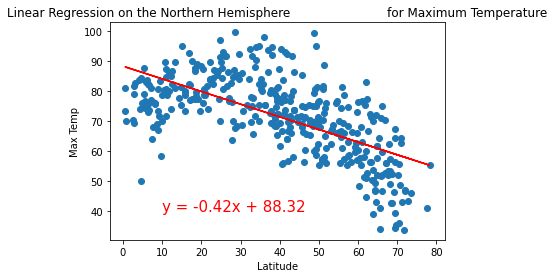

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

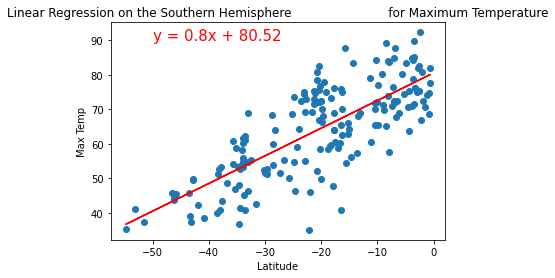

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

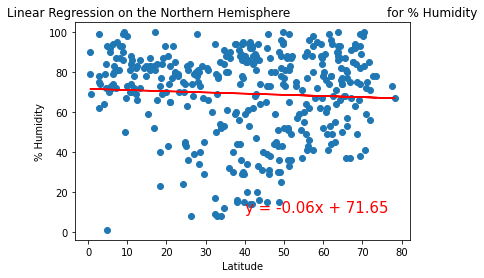

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

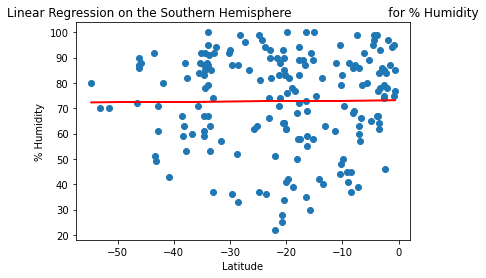

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

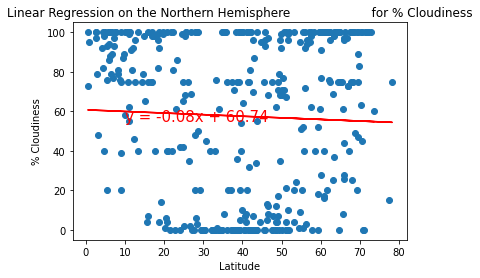

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

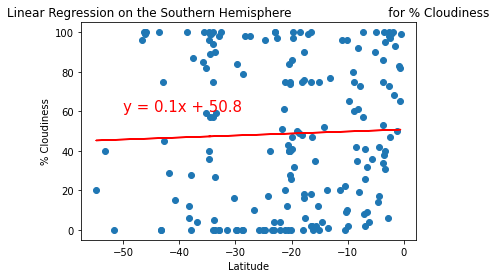

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

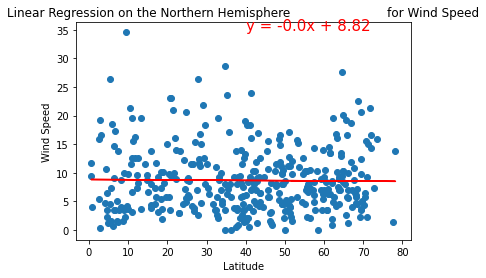

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

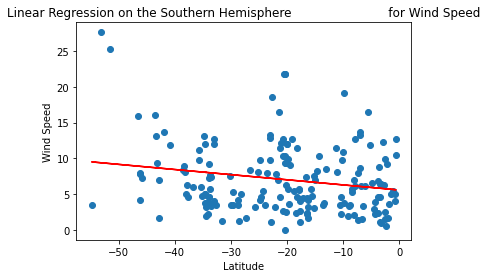

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))